In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [2]:
data = pd.read_csv("weather_pandas.csv")
data = pd.DataFrame(data)
display(data.head(5))
data.info()

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,2020-01-01,36.0,13.0,0.00,0.00,5.00
1,2020-01-02,37.0,31.0,0.00,0.00,5.00
2,2020-01-03,36.0,24.0,T,T,4.00
3,2020-01-04,30.0,24.0,0.00,0.00,4.00
4,2020-01-05,38.0,24.0,0.01,T,4.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             1437 non-null   object 
 1   Maximum Temperature degrees (F)  1437 non-null   float64
 2   Minimum Temperature degrees (F)  1437 non-null   float64
 3   Precipitation (inches)           1437 non-null   object 
 4   Snow (inches)                    1437 non-null   object 
 5   Snow Depth (inches)              1437 non-null   object 
dtypes: float64(2), object(4)
memory usage: 67.5+ KB


In [3]:
data["Precipitation (inches)"] = data["Precipitation (inches)"].replace("T", "0.0")
data["Precipitation (inches)"] = pd.to_numeric(data["Precipitation (inches)"])
data["Snow (inches)"] = data["Snow (inches)"].replace("T", "0.0")
data["Snow (inches)"] = pd.to_numeric(data["Snow (inches)"])
data["Snow Depth (inches)"] = data["Snow Depth (inches)"].replace("T", "0.0")
data["Snow Depth (inches)"] = pd.to_numeric(data["Snow Depth (inches)"])
data["Date"] = pd.to_datetime(data["Date"])
display(data.head(5))
data.info()

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
0,2020-01-01,36.0,13.0,0.00,0.0,5.0
1,2020-01-02,37.0,31.0,0.00,0.0,5.0
2,2020-01-03,36.0,24.0,0.00,0.0,4.0
3,2020-01-04,30.0,24.0,0.00,0.0,4.0
4,2020-01-05,38.0,24.0,0.01,0.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1437 non-null   datetime64[ns]
 1   Maximum Temperature degrees (F)  1437 non-null   float64       
 2   Minimum Temperature degrees (F)  1437 non-null   float64       
 3   Precipitation (inches)           1437 non-null   float64       
 4   Snow (inches)                    1437 non-null   float64       
 5   Snow Depth (inches)              1437 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 67.5 KB


In [4]:
#data["Season"] = data["Date"]

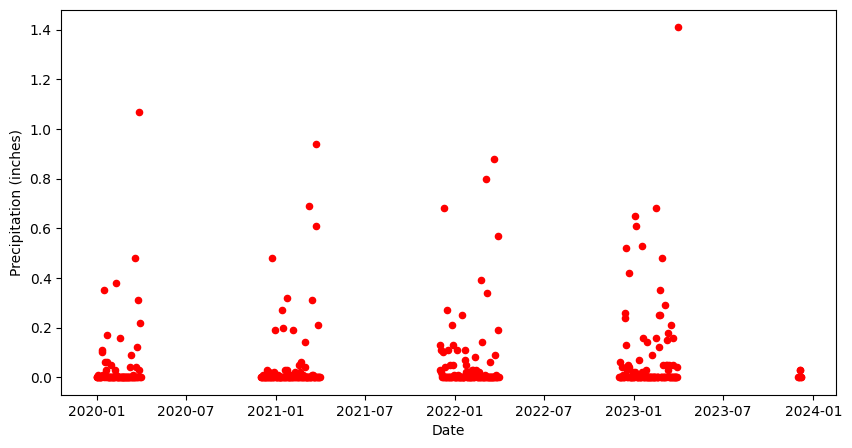

In [5]:
# fig, ax = plt.subplots()
summer = data[(data["Date"].dt.month >= 6) & (data["Date"].dt.month <= 8)]
summer.tail(3)
winter = data[
    (data["Date"].dt.month == 12)
    | ((data["Date"].dt.month >= 1) & (data["Date"].dt.month <= 3))
]
winter.head(3)
winter.plot(
    x="Date", y="Precipitation (inches)", kind="scatter", figsize=(10, 5), color="r"
)
# summer.plot(x="Date", y="Precipitation (inches)", kind="scatter", figsize=(10, 5),color = 'b')
plt.show()

In [6]:
# Maximum temperature in January 2022
# Challenge - using list comprehensions, or another method get the maximum temperature of every month in 2022
max(
    data["Maximum Temperature degrees (F)"][
        (data["Date"].dt.year == 2022) & (data["Date"].dt.month == 1)
    ]
)

42.0

Date  Maximum Temperature degrees (F)  \
Date Date                                               
2020 1    2020-01-31                             38.0   
     2    2020-02-29                             46.0   
     3    2020-03-31                             61.0   
     4    2020-04-30                             74.0   
     5    2020-05-31                             81.0   
     6    2020-06-30                             96.0   
     7    2020-07-31                             93.0   
     8    2020-08-31                             92.0   
     9    2020-09-30                             85.0   
     10   2020-10-31                             80.0   
     11   2020-11-30                             75.0   
     12   2020-12-31                             52.0   

           Minimum Temperature degrees (F)  Precipitation (inches)  \
Date Date                                                            
2020 1                                31.0                    0.35   
     2                                31.0                    0.38   
     3                                44.0                    1.07   
     4                                52.0                    0.83   
     5                                66.0                    2.47   
     6                                74.0                    2.37   
     7                                75.0                    0.51   
     8                                76.0                    1.27   
     9                                65.0                    0.25   
     10                               56.0                    0.79   
     11                               60.0                    0.62   
     12                               32.0                    0.48   

           Snow (inches)  Snow Depth (inches)  
Date Date                                      
2020 1               4.7                  9.0  
     2               4.8                 10.0  
     3               0.8                  4.0  
     4               6.6                  5.0  
     5               0.0                  0.0  
     6               0.0                  0.0  
     7               0.0                  0.0  
     8               0.0                  0.0  
     9               0.0                  0.0  
     10              7.9                  7.0  
     11              5.5                  6.0  
     12              8.7                  9.0

<Axes: xlabel='Maximum Temperature degrees (F)'>

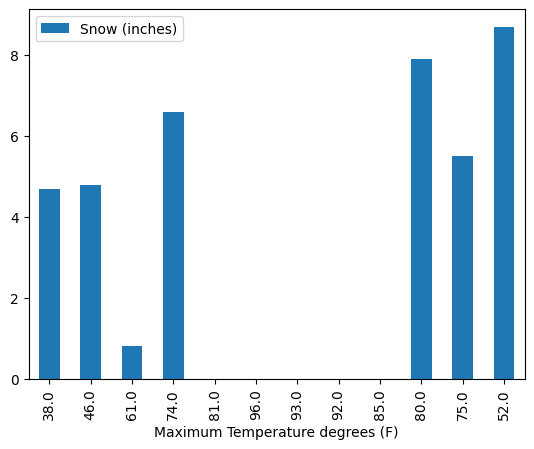

In [7]:
Maxes = data.groupby([data["Date"].dt.year, data["Date"].dt.month]).max()
display(Maxes.head(12))
Maxes[0:12].plot.bar(x="Maximum Temperature degrees (F)", y="Snow (inches)")

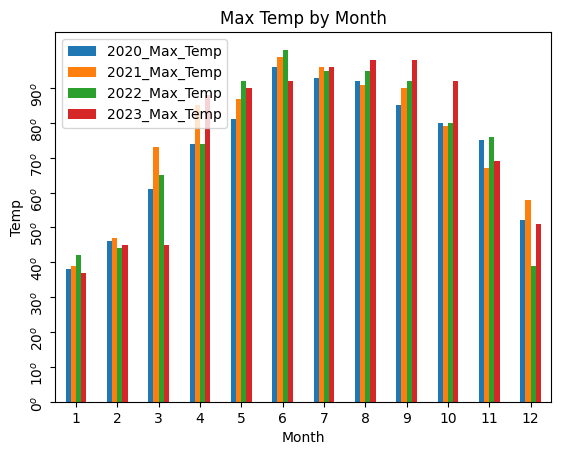

In [8]:
max2020 = Maxes[0:12]["Maximum Temperature degrees (F)"].reset_index(
    level=0, drop=True
)
max2021 = Maxes[12:24]["Maximum Temperature degrees (F)"].reset_index(
    level=0, drop=True
)
max2022 = Maxes[24:36]["Maximum Temperature degrees (F)"].reset_index(
    level=0, drop=True
)
max2023 = Maxes[36:48]["Maximum Temperature degrees (F)"].reset_index(
    level=0, drop=True
)
max_month_year = {
    "2020_Max_Temp": max2020,
    "2021_Max_Temp": max2021,
    "2022_Max_Temp": max2022,
    "2023_Max_Temp": max2023,
}
max_month_year = pd.concat(max_month_year, axis=1)
# display(max_month_year)

max_month_year.plot.bar(y=["2020_Max_Temp", "2021_Max_Temp", "2022_Max_Temp", "2023_Max_Temp"])
plt.title("Max Temp by Month")
plt.xlabel("Month")
plt.ylabel("Temp")
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 100, step=10), rotation=90)  
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d$^o$"))
plt.show()

In [9]:
Mins = data.groupby([data["Date"].dt.year, data["Date"].dt.month]).min()
display(Mins.head())

Date  Maximum Temperature degrees (F)  \
Date Date                                               
2020 1    2020-01-01                              6.0   
     2    2020-02-01                              1.0   
     3    2020-03-01                             34.0   
     4    2020-04-01                             30.0   
     5    2020-05-01                             48.0   

           Minimum Temperature degrees (F)  Precipitation (inches)  \
Date Date                                                            
2020 1                                -9.0                     0.0   
     2                               -12.0                     0.0   
     3                                20.0                     0.0   
     4                                19.0                     0.0   
     5                                34.0                     0.0   

           Snow (inches)  Snow Depth (inches)  
Date Date                                      
2020 1               0.0                  3.0  
     2               0.0                  4.0  
     3               0.0                  0.0  
     4               0.0                  0.0  
     5               0.0                  0.0

In [10]:
min2020 = Mins[0:12]["Minimum Temperature degrees (F)"].reset_index(level=0, drop=True)
min2021 = Mins[12:24]["Minimum Temperature degrees (F)"].reset_index(
    level=0, drop=True
)
min2022 = Mins[24:36]["Minimum Temperature degrees (F)"].reset_index(
    level=0, drop=True
)
min2023 = Mins[36:48]["Minimum Temperature degrees (F)"].reset_index(
    level=0, drop=True
)
min_month_year = {
    "2020_Min_Temp": min2020,
    "2021_Min_Temp": min2021,
    "2022_Min_Temp": min2022,
    "2023_Min_Temp": min2023,
}
min_month_year = pd.concat(min_month_year, axis=1)
display(min_month_year)

,2020_Min_Temp,2021_Min_Temp,2022_Min_Temp,2023_Min_Temp
Date,,,,
1,-9.0,1.0,-17.0,-8.0
2,-12.0,-19.0,-9.0,-13.0
3,20.0,13.0,-1.0,7.0
4,19.0,20.0,22.0,22.0
5,34.0,36.0,39.0,38.0
6,53.0,51.0,51.0,50.0
7,57.0,54.0,59.0,56.0
8,54.0,56.0,56.0,55.0
9,38.0,44.0,37.0,47.0


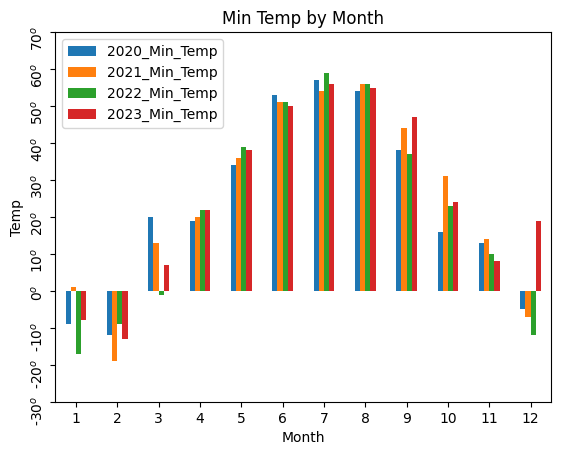

In [11]:
min_month_year.plot.bar(
    y=["2020_Min_Temp", "2021_Min_Temp", "2022_Min_Temp", "2023_Min_Temp"]
)
plt.title("Min Temp by Month")
plt.xlabel("Month")
plt.ylabel("Temp")
plt.xticks(rotation=0)
plt.yticks(np.arange(-30, 80, step=10), rotation=90)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d$^o$"))
plt.show()

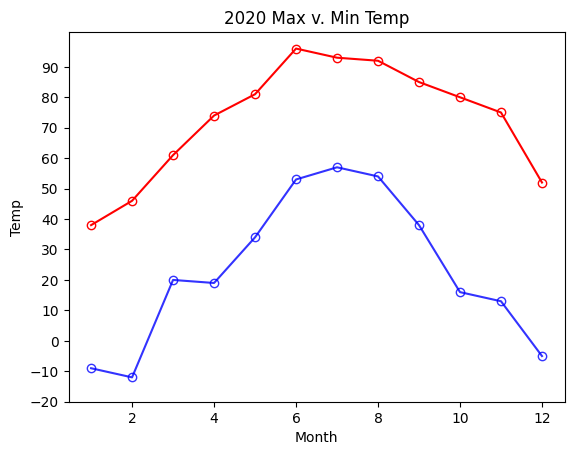

In [12]:
#var = 

ax = min_month_year["2020_Min_Temp"].plot(
    color="blue", alpha=0.8, marker="o", markerfacecolor="None"
)
max_month_year["2020_Max_Temp"].plot(
    color="red", alpha=1, marker="o", markerfacecolor="None"
)

# ax = min_month_year.plot(y="2020_Min_Temp",marker="s",color="r",markerfacecolor="None", width=1,alpha=0.8, legend=True)
# max_month_year.plot(y="2020_Max_Temp",marker="s",color="r",markerfacecolor="None", width=0.75,alpha=0.9, legend=True)
plt.title("2020 Max v. Min Temp")
plt.xlabel("Month")
plt.ylabel("Temp")
plt.yticks(np.arange(-20,100,10))
plt.show()

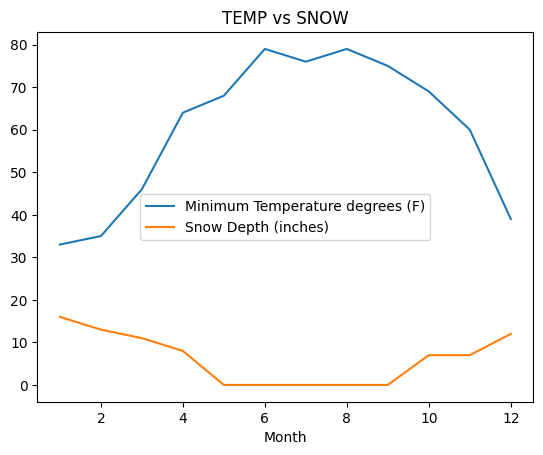

Date  Month
2020  1         38.0
      2         46.0
      3         61.0
      4         74.0
      5         81.0
      6         96.0
      7         93.0
      8         92.0
      9         85.0
      10        80.0
      11        75.0
      12        52.0
2021  1         39.0
      2         47.0
      3         73.0
      4         85.0
      5         87.0
      6         99.0
      7         96.0
      8         91.0
      9         90.0
      10        79.0
      11        67.0
      12        58.0
2022  1         42.0
      2         44.0
      3         65.0
      4         74.0
      5         92.0
      6        101.0
      7         95.0
      8         95.0
      9         92.0
      10        80.0
      11        76.0
      12        39.0
2023  1         37.0
      2         45.0
      3         45.0
      4         88.0
      5         90.0
      6         92.0
      7         96.0
      8         98.0
      9         98.0
      10        92.0
      11        69.0
 

In [13]:
data["Month"] = data["Date"].dt.month
MaxTemp = data.groupby([data["Date"].dt.year,data["Month"]])["Maximum Temperature degrees (F)"].max()
aMaxSnow = data.groupby(data["Month"])["Snow (inches)"].max()
Maxes = data.groupby(data["Month"]).max()
Maxes["Month"] = Maxes["Date"].dt.month
Maxes.plot(x="Month", y=["Minimum Temperature degrees (F)", "Snow Depth (inches)"])
plt.title("TEMP vs SNOW")
#plt.ylabel("Temp + depth")
plt.show()
print(MaxTemp)
# Maximum Temperature degrees (F)  Minimum Temperature degrees (F)   Precipitation (inches)   Snow (inches)  Snow Depth (inches)b

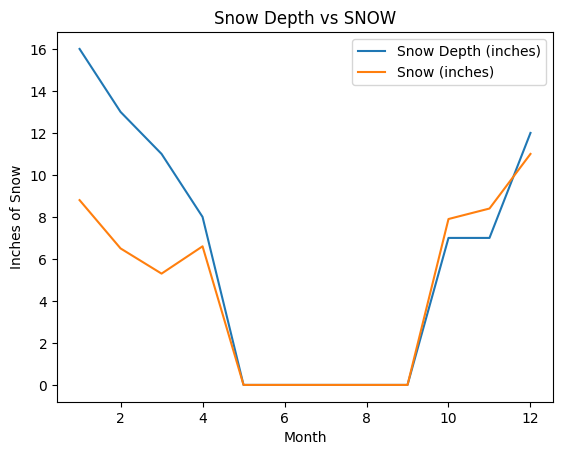

In [14]:
Maxes.plot(x="Month", y=["Snow Depth (inches)", "Snow (inches)"])
plt.title("Snow Depth vs SNOW")
plt.ylabel("Inches of Snow")
plt.show()
# Maximum Temperature degrees (F)  Minimum Temperature degrees (F)   Precipitation (inches)   Snow (inches)  Snow Depth (inches)

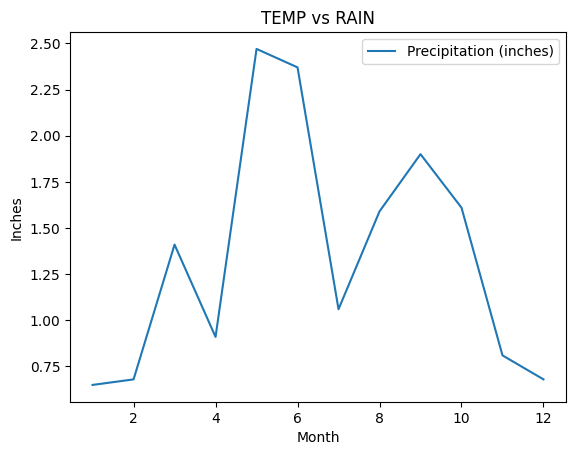

In [15]:
# Maximum Temperature degrees (F)  Minimum Temperature degrees (F)   Precipitation (inches)   Snow (inches)  Snow Depth (inches)
Maxes.plot(x="Month", y="Precipitation (inches)")
plt.title("TEMP vs RAIN")
plt.ylabel("Inches")
plt.show()

In [16]:
data.value_counts()

Date        Maximum Temperature degrees (F)  Minimum Temperature degrees (F)  Precipitation (inches)  Snow (inches)  Snow Depth (inches)  Month
2020-01-01  36.0                             13.0                             0.00                    0.0            5.0                  1        1
2022-08-02  95.0                             65.0                             0.16                    0.0            0.0                  8        1
2022-08-22  82.0                             62.0                             0.00                    0.0            0.0                  8        1
2022-08-21  83.0                             61.0                             0.00                    0.0            0.0                  8        1
2022-08-20  76.0                             64.0                             0.00                    0.0            0.0                  8        1
                                                                                                               

      Maximum  Minimum    Average  Standard Deviation
Date                                                 
1        42.0      1.0  25.435484            9.935763
2        47.0     -4.0  25.831858           13.519102
3        73.0     18.0  42.830645            9.912398
4        88.0     30.0  53.891667           12.308906
5        92.0     48.0  70.620968           10.026463


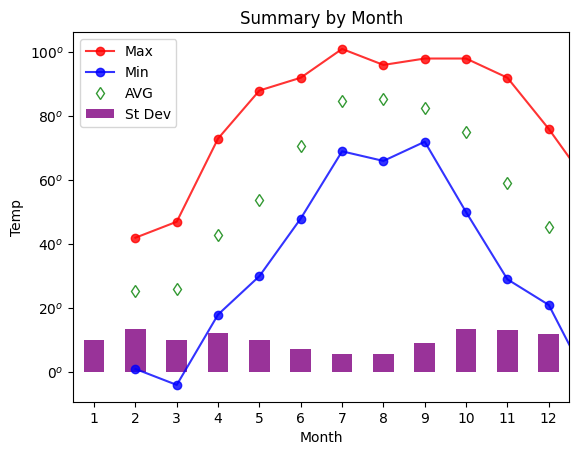

In [54]:
Month_Max = data.groupby(data["Date"].dt.month)["Maximum Temperature degrees (F)"].max()
Month_Min = data.groupby(data["Date"].dt.month)["Maximum Temperature degrees (F)"].min()
Month_avg = data.groupby(data["Date"].dt.month)["Maximum Temperature degrees (F)"].mean()
Month_std = data.groupby(data["Date"].dt.month)["Maximum Temperature degrees (F)"].std()
stats = pd.concat([Month_Max, Month_Min, Month_avg, Month_std], axis=1)
stats.columns = ["Maximum", "Minimum", "Average", "Standard Deviation"]
# stats.reset_index()
print(stats.head())
ax = stats["Maximum"][0:12].plot(
    color="red", alpha=0.8, marker="o", legend=True
)
stats["Minimum"][0:12].plot(
    color="blue", alpha=0.8, marker="o", legend=True
)
stats["Average"].plot(
    color="green",
    linestyle="None",
    alpha=0.8,
    marker="d",
    markerfacecolor="None",
    legend=True,
)
stats["Standard Deviation"][0:12].plot.bar(color="purple", alpha=0.8, legend=True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d$^o$"))
plt.title("Summary by Month")
plt.xlabel("Month")
plt.ylabel("Temp")
plt.xticks(rotation=0)
plt.legend(("Max","Min","AVG","St Dev"),loc="best")
plt.show()